# Анализ эффективности рекламных вложений приложения  Procrastinate Pro+

В данном исследовании проводится анализ убытков приложения Procrastinate Pro+. Несмотря на вложения в рекламу, комапния не смогла выйти в плюс и ее доход находится ниже уровня окупаемости. 

В распоряжении есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.

**Целью исследования явлеятся определение**:

- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

**Описание данных:**
Файл visits_info_short.csv хранит лог сервера с информацией о посещениях сайта, orders_info_short.csv — информацию о заказах, а costs_info_short.csv — информацию о расходах на рекламу.

Структура visits_info_short.csv:

- User Id — уникальный идентификатор пользователя,
- Region — страна пользователя,
- Device — тип устройства пользователя,
- Channel — идентификатор источника перехода,
- Session Start — дата и время начала сессии,
- Session End — дата и время окончания сессии.

Структура orders_info_short.csv:

- User Id — уникальный идентификатор пользователя,
- Event Dt — дата и время покупки,
- Revenue — сумма заказа.

Структура costs_info_short.csv:

- dt — дата проведения рекламной кампании,
- Channel — идентификатор рекламного источника,
- costs — расходы на эту кампанию.

**План проекта:**

- Загрузка и предобработка данных
- Исследовательский анализ данных

        - Составление профилей пользователей. Определение минимальной и максимальной даты привлечения пользователей.
        - Выяснение, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построение таблицы, отражающей количество пользователей и долю платящих из каждой страны.
        -Исследование, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построение таблицы, отражающей количество пользователей и долю платящих для каждого устройства.
        - Изучение рекламных источников привлечения и определение каналов, из которых пришло больше всего платящих пользователей. Построение таблицы, отражающей количество пользователей и долю платящих для каждого канала привлечения.

- Маркетинг

        - Расчет общей суммы расходов на маркетинг.
        - Исследование, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
        - Визуализация динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. 
        - Исследование, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника.

- Оценка окупаемости рекламы

- Общий вывод и рекомендации


### Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [2]:
visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')

#### Предобработка данных о визитах

In [3]:
visits.head()

User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40

In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [5]:
visits.isna().sum()

User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64

**Пропусков в данных нет**

In [6]:
visits = visits.rename(
    columns = {
        'User Id':'user_id',
        'Region':'region',
        'Device':'device',
        'Channel':'channel',
        'Session Start':'session_start',
        'Session End':'session_end'
    }
)

In [7]:
visits.head()

user_id         region   device  channel        session_start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           session_end  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40

In [8]:
visits.duplicated().sum()

0

**Дубликатов в данных нет**

In [9]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

In [10]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


##### Вывод 
- в данных о визитах отсутствуют пропуски и дубликаты;
- привели названия колонок к каноническому виду;
- привели столбцы с датой и временем к соответствующему типу.

#### Предобработка данных о заказах

In [11]:
orders.head()

User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99

In [12]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [13]:
orders.isna().sum()

User Id     0
Event Dt    0
Revenue     0
dtype: int64

**Пропусков в данных нет**

In [14]:
orders = orders.rename(
    columns = {
        'User Id':'user_id',
        'Event Dt':'event_dt',
        'Revenue':'revenue'
    }
)

In [15]:
orders.head()

user_id             event_dt  revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99

In [16]:
orders.duplicated().sum()

0

**Дубликатов в данных нет**

In [17]:
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

In [18]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


##### Вывод 
- в данных о заказах отсутствуют пропуски и дубликаты;
- привели названия колонок к каноническому виду;
- привели столбец с датой и временем к соответствующему типу.

#### Предобработка данных о расходах

In [19]:
costs.head()

dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1

In [20]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [21]:
costs.columns = costs.columns.str.lower()

In [22]:
costs.head()

dt   channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1

In [23]:
costs['dt']=pd.to_datetime(costs['dt'])
costs['week'] = costs['dt'].dt.isocalendar().week
costs['month'] = costs['dt'].dt.month
costs['dt']=costs['dt'].dt.date

In [24]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
 3   week     1800 non-null   UInt32 
 4   month    1800 non-null   int64  
dtypes: UInt32(1), float64(1), int64(1), object(2)
memory usage: 65.2+ KB


In [25]:
costs.duplicated().sum()

0

In [26]:
costs.isna().sum()

dt         0
channel    0
costs      0
week       0
month      0
dtype: int64

##### Вывод 
- в данных о расходах отсутствуют пропуски и дубликаты;
- привели названия колонок к каноническому виду;
- привели столбец с датой к соответствующему типу.

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

#### Функция для создания профилей пользователей

In [27]:
def get_profiles(sessions, orders, events, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles
 

#### Функция для подсчета Retention Rate

In [28]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

#### Функция для подсчета конверсии

In [29]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

#### Функция для подсчета LTV и ROI

In [30]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

#### Функция для сглаживания фрейма

In [31]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

#### Функция для построения графика Retention Rate

In [32]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

#### Функция для построения графика конверсии

In [33]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

#### Функция для визуализации LTV и ROI

In [34]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(30, 20))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

#### Составление профилей пользователей и определение минимальной и максимальной даты привлечения

In [35]:
events = None

In [36]:
profiles = get_profiles(visits, orders, events, costs)
profiles.head()

user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769

In [37]:
min_date = profiles['first_ts'].min()
max_date = profiles['first_ts'].max()
min_date, max_date

(Timestamp('2019-05-01 00:00:41'), Timestamp('2019-10-27 23:59:04'))

##### Вывод
- **Минимальная дата привлечения пользователей - 1 мая 2019 года**
- **Максимальная дата привлечения пользователей - 27 октября 2019 года**

Момент анализа - 1 ноября 2019 года, в компании считается, что окупаемость должна наступать не позже, чем через 14 дней после привлечения, поэтому в нашему случае **максимальной датой исследования будет 19 октября 2019 года**

####  Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [38]:
(profiles.groupby('region')
 .agg({'payer':'mean', 'user_id':'nunique'})
 .rename(columns={'user_id': 'unique_users', 'payer':'paying_users'})
 .sort_values(by = 'paying_users', ascending=False)
)

paying_users  unique_users
region                                   
United States      0.069019        100002
Germany            0.041119         14981
UK                 0.039829         17575
France             0.037994         17450

##### Вывод
Больше всего платящих пользователей приходится на США, меньше всего - на Францию

####  Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства

In [39]:
(profiles.groupby('device')
 .agg({'payer':'mean', 'user_id':'nunique'})
 .rename(columns={'user_id': 'unique_users', 'payer':'paying_users'})
 .sort_values(by = 'paying_users', ascending=False)
)

paying_users  unique_users
device                             
Mac          0.063644         30042
iPhone       0.062079         54479
Android      0.058518         35032
PC           0.050468         30455

##### Вывод 
Больше всего платящих пользователей предпочитают Mac, меньше всего платящих пользоватаелей пользуются PC

#### Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения

In [40]:
(profiles.groupby('channel')
 .agg({'payer':'mean', 'user_id':'nunique'})
 .rename(columns={'user_id': 'unique_users', 'payer':'paying_users'})
 .sort_values(by = 'paying_users', ascending=False)
)

paying_users  unique_users
channel                                       
FaceBoom                0.122049         29144
AdNonSense              0.113402          3880
lambdaMediaAds          0.104700          2149
TipTop                  0.096007         19561
RocketSuperAds          0.079137          4448
WahooNetBanner          0.052964          8553
YRabbit                 0.038265          4312
MediaTornado            0.035747          4364
LeapBob                 0.030633          8553
OppleCreativeMedia      0.027077          8605
organic                 0.020553         56439

##### Вывод
Больше всего платящих пользователей приходят через канал FaceBoom, меньше всего приходят самостоятельно 

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

#### Посчитайте общую сумму расходов на маркетинг

In [41]:
costs['costs'].sum()

105497.30000000002

#### Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.

In [42]:
expenses = (costs.groupby('channel')
 .agg({'costs':'sum'})
 .sort_values(by = 'costs', ascending=False)
)
expenses['share'] = expenses['costs']/expenses['costs'].sum()
expenses

costs     share
channel                               
TipTop              54751.30  0.518983
FaceBoom            32445.60  0.307549
WahooNetBanner       5151.00  0.048826
AdNonSense           3911.25  0.037074
OppleCreativeMedia   2151.25  0.020392
RocketSuperAds       1833.00  0.017375
LeapBob              1797.60  0.017039
lambdaMediaAds       1557.60  0.014764
MediaTornado          954.48  0.009047
YRabbit               944.22  0.008950

##### Вывод
Больше всего потратили на источник TipTop, расходы на этот источник составляют больше половины общей суммы расходов по всем источникам. Второе место по расходам занимает FaceBoom, расходы на остальные источники значительны меньше, чем на первых двух лидеров. Меньше всего потратили на источник YRabbit

#### Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.

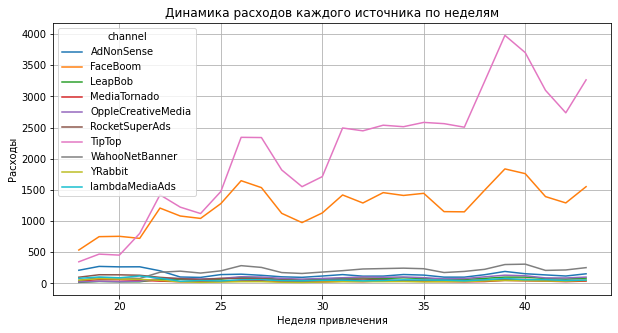

In [43]:
(costs.pivot_table(index='week', columns='channel', values ='costs', aggfunc='sum')
 .plot(grid=True, figsize=(10,5))
)
plt.title('Динамика расходов каждого источника по неделям')
plt.xlabel('Неделя привлечения')
plt.ylabel('Расходы')
plt.show()

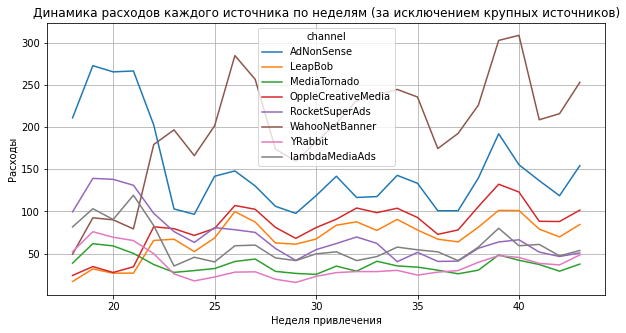

In [44]:
(costs.query('channel != "TipTop" and channel != "FaceBoom"').pivot_table(index='week', columns='channel', values ='costs', aggfunc='sum')
 .plot(grid=True, figsize=(10,5))
)
plt.title('Динамика расходов каждого источника по неделям (за исключением крупных источников)')
plt.xlabel('Неделя привлечения')
plt.ylabel('Расходы')
plt.show()

In [45]:
(costs.pivot_table(index='month', columns='channel', values ='costs', aggfunc='sum')
 .plot(grid=True, figsize=(10,5))
)
plt.title('Динамика расходов каждого источника по месяцам')
plt.xlabel('Месяц привлечения')
plt.ylabel('Расходы')
plt.show()

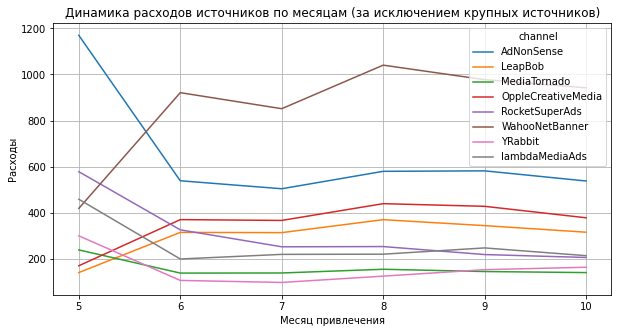

In [46]:
(costs.query('channel != "TipTop" and channel != "FaceBoom"').pivot_table(index='month', columns='channel', values ='costs', aggfunc='sum')
 .plot(grid=True, figsize=(10,5))
)
plt.title('Динамика расходов источников по месяцам (за исключением крупных источников)')
plt.xlabel('Месяц привлечения')
plt.ylabel('Расходы')
plt.show()

##### Вывод
Больше всего расходов идет на источники TipTop и FaceBoom,  в динамике по неделям и месяцам расходы по этим источникам имеют тенденцию к росту, причем траты на FaceBoom растут медленнее, чем на TipTop. Расходы на остальные источники значительно меньше: они не превышают 350 долларов в неделю  и 1200 долларов в месяц


#### Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей

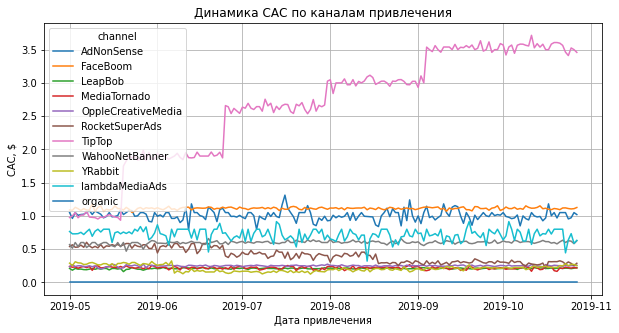

In [47]:
profiles.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(10, 5))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

In [48]:
profiles.pivot_table( index='channel', values='acquisition_cost', aggfunc='mean'
).sort_values(by = 'acquisition_cost', ascending=False)

acquisition_cost
channel                             
TipTop                      2.799003
FaceBoom                    1.113286
AdNonSense                  1.008054
lambdaMediaAds              0.724802
WahooNetBanner              0.602245
RocketSuperAds              0.412095
OppleCreativeMedia          0.250000
YRabbit                     0.218975
MediaTornado                0.218717
LeapBob                     0.210172
organic                     0.000000

##### Вывод
Стоимость привлечения у источника TipTop с течением времени растет, средняя стоимость составляет 2,79 долларов. Стоимость остальных источников гораздо стабильнее, изменение CAC не столь значительное в сравнении с TipTop. Средняя стоимость привлечения одного пользователя FaceBoom составляет 1.11 долларов, AdNonSense - 1.01 доллар, у остальных источников средняя стоимость не превышает одного доллара.

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

#### Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [49]:
profiles = profiles.query('channel!="organic"')
observation_date = datetime(2019, 11, 1).date()
horizon = 14

In [50]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles, orders, observation_date , horizon)
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14, window =3)

##### Вывод
Из графика ROI можно сделать вывод, что реклама не окупается. С течением времени ROI 14-ого дня убывает, а стоимость привлечения увеличивается.

#### Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.

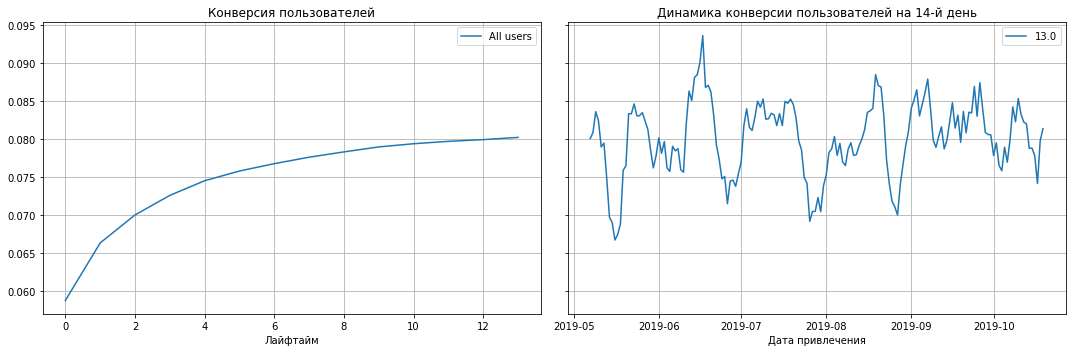

In [51]:
conversion_raw, conversion, conversion_history = get_conversion(profiles, orders, observation_date , horizon)
plot_conversion(conversion, conversion_history, horizon, window=7)

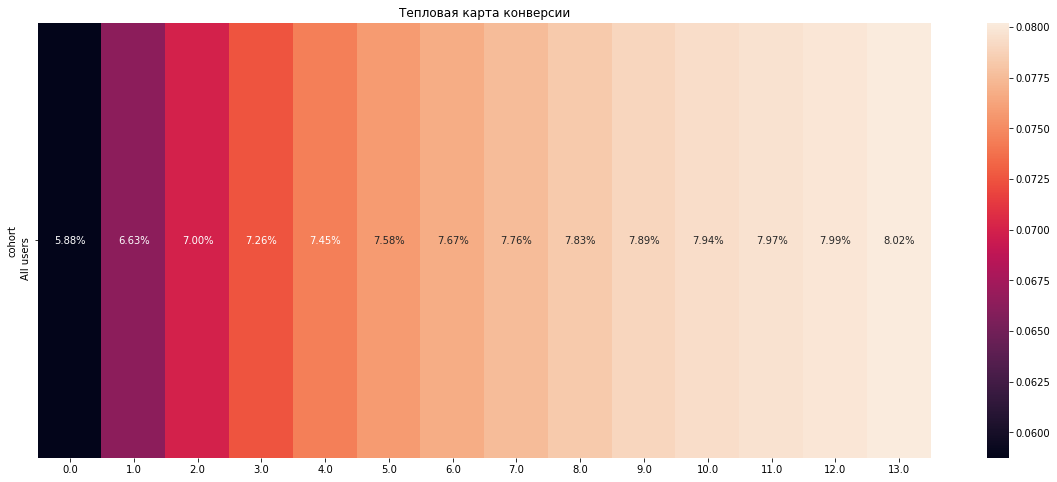

In [52]:
plt.figure(figsize=(20,8))
sns.heatmap(conversion.drop(columns=['cohort_size']), annot=True, fmt='.2%')
plt.title('Тепловая карта конверсии')
plt.show() 

##### Вывод по общей конверсии
Кривая конверсии плавно растет от нуля в направлении единицы: от 5.88% в первый день «жизни» пользователей до 8.02% на 14 день. Конверсия 14-ого дня была максимальной в июне и минимальной в мае 2019 года.

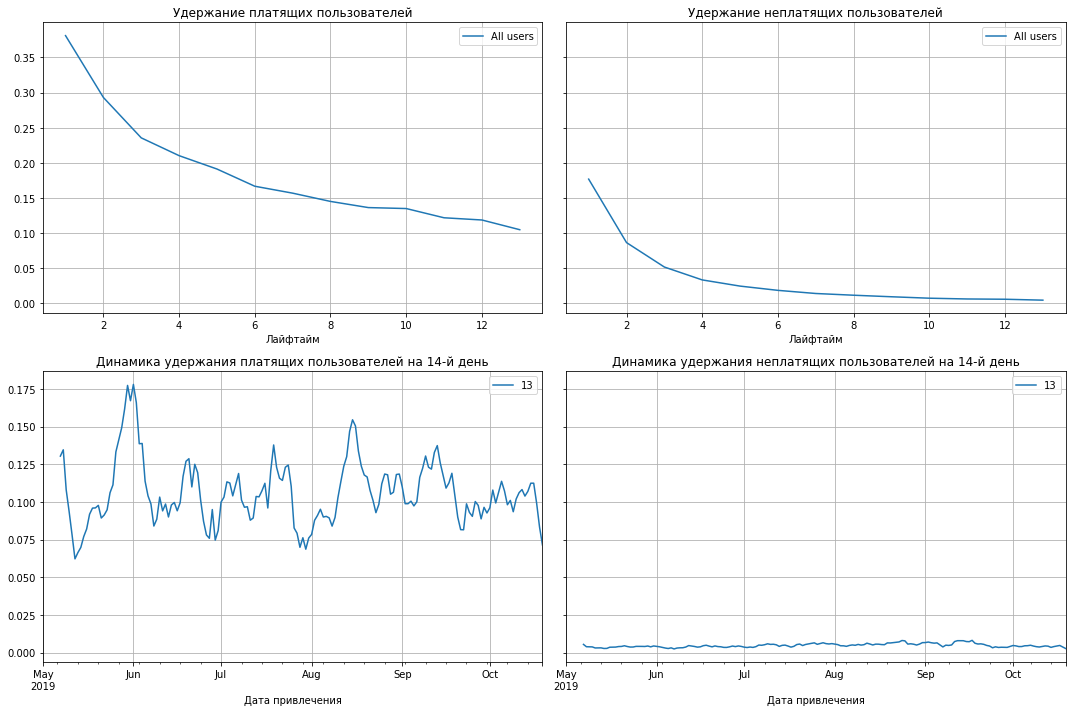

In [53]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date , horizon)

plot_retention(retention_grouped, retention_history, horizon) 

##### Вывод по общему удержанию 
Удержание плавно снижается, причем удержание неплатящих пользователей убывает быстрее. Динамика удержания на 14-й день у платящих пользователей сильно выше, чем у неплатящих. Самое большое удержание платящих пользователей на 14 день пришлось на начало июня, самое низкое - на его конец. Динамика удержания неплатящих пользователей на 14 день стабильно очень низкая и колеблется около нуля.

#### Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [54]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles, orders, observation_date , horizon, dimensions=['device'])
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window = 9)

##### Вывод
Затраты на пользователей PC окупаются, ROI пользователей Android, IPhone и Mac не превышают уровень окупаемости. Стоимость привлечения с течением времeни растет, причем стоимость привлечения пользователей PC и Android меньше, чем стоимость для остальных устройств.ROI пользователей на 14 день с течением времени уменьшается.

#### Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

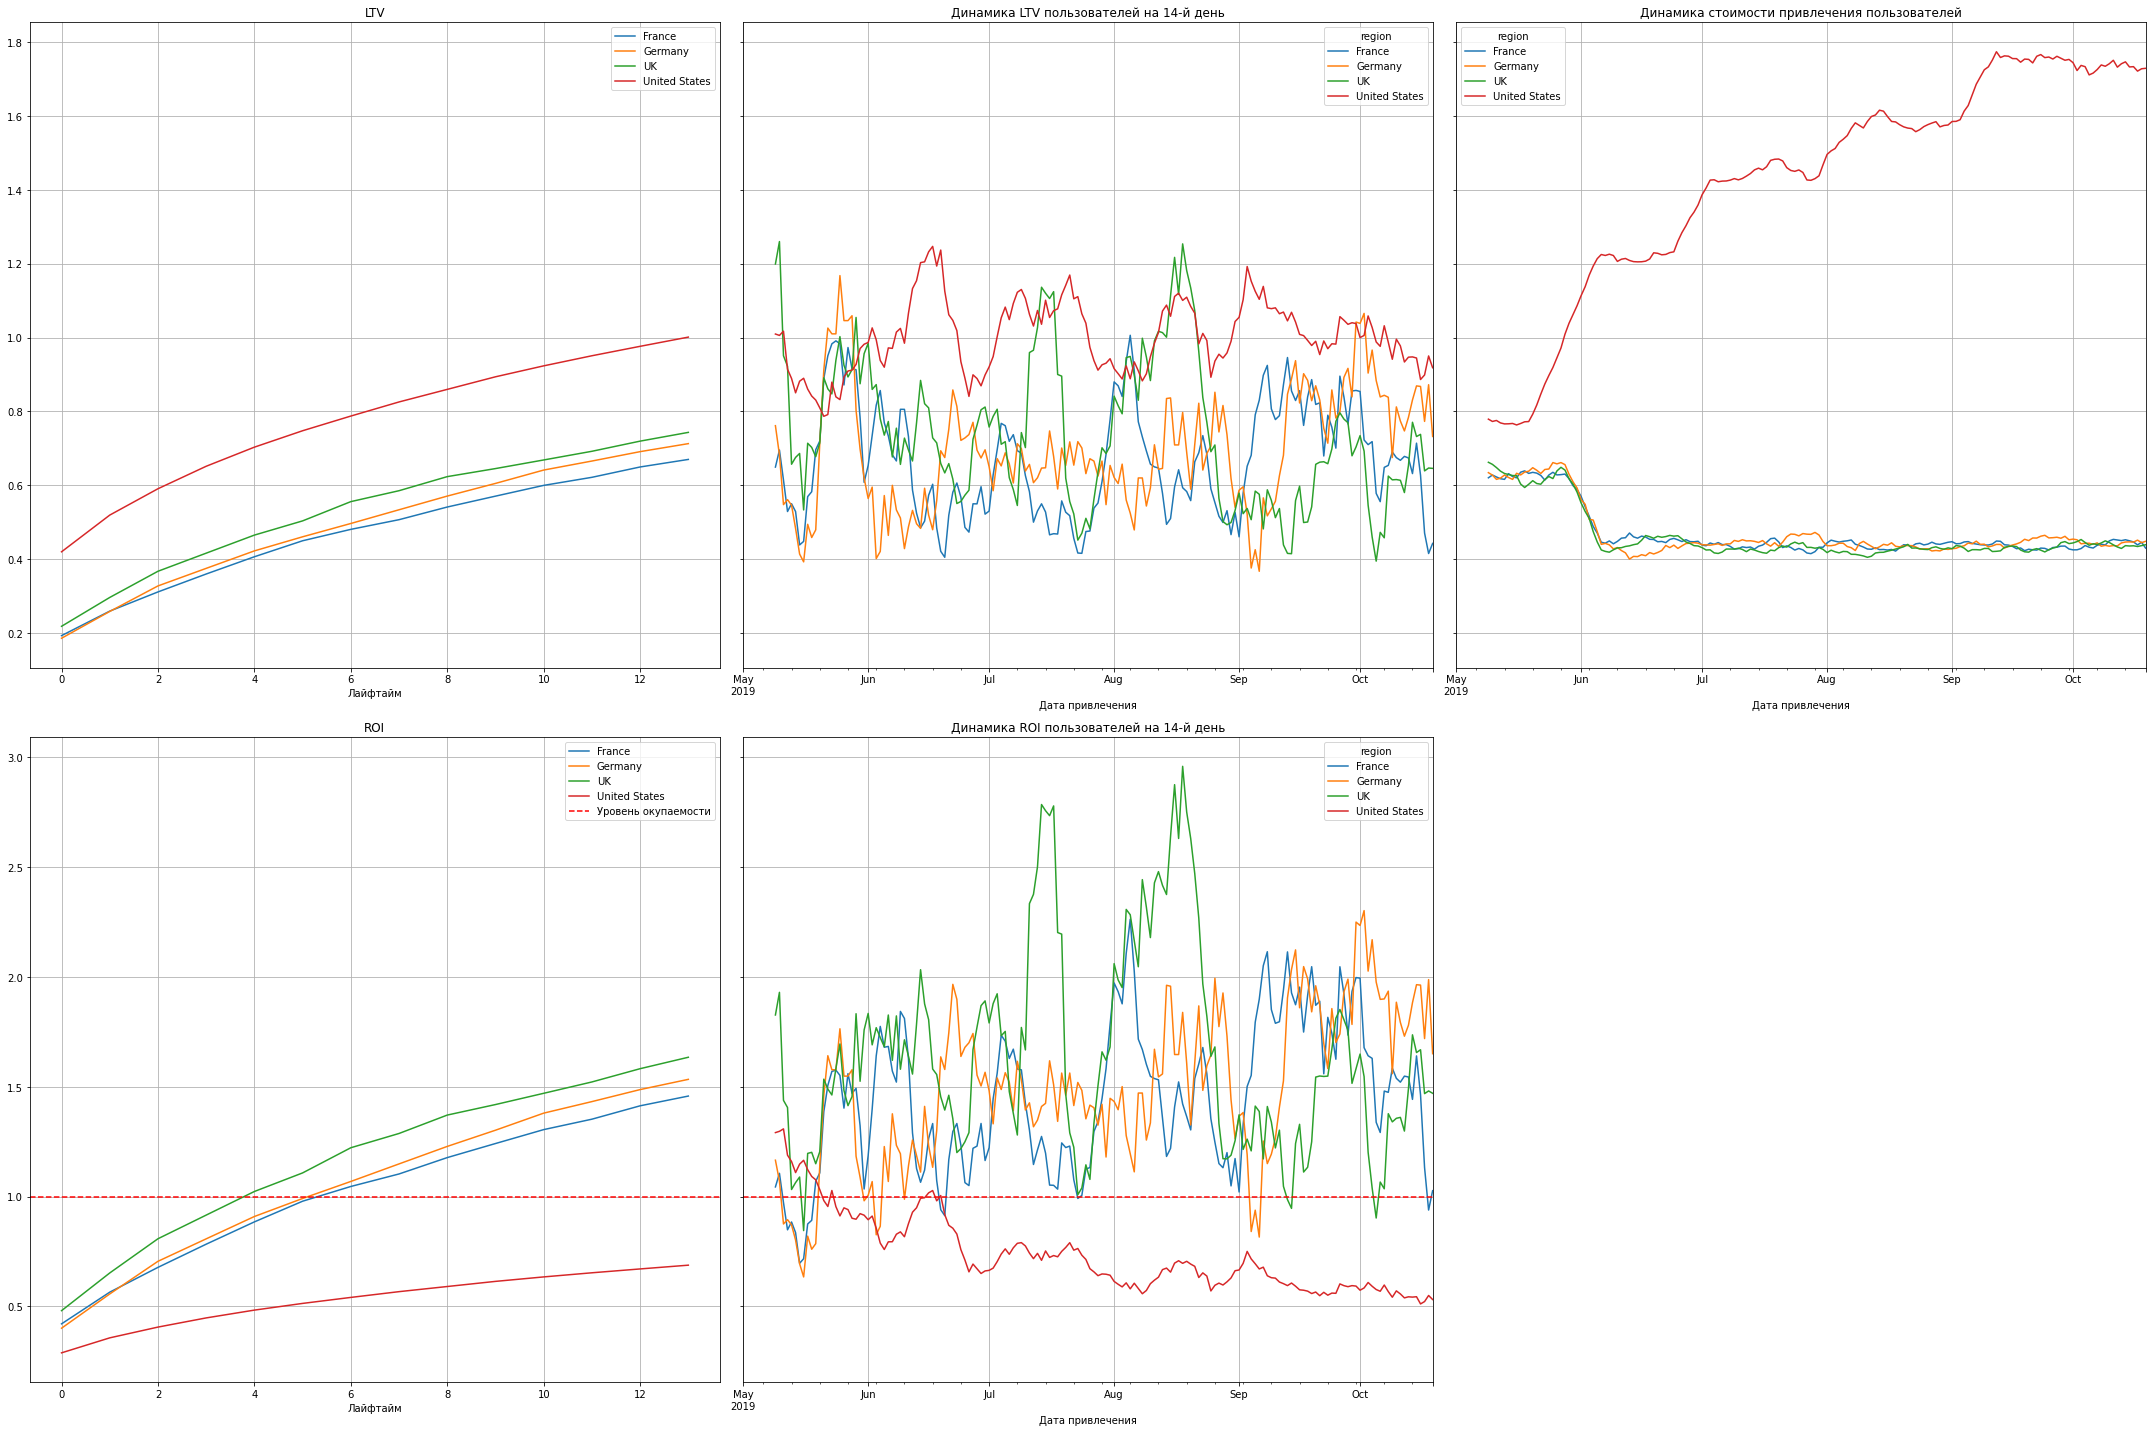

In [55]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles, orders, observation_date , horizon, dimensions=['region'])
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window = 9)

##### Вывод 
Реклама окупилась во всех регионах, за исключением США, причем стоимость привлечения  и LTV пользователей из США сильно превышает стоимость по другим регионам. Отметим, что в Америке стоимость привлечения со временем растет, а в остальных регионах все стабильнее. ROI 14 дня в США со временем убывает, а LTV 14 дня преимущественно выше, чем в других странах.

#### Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI

In [56]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles, orders, observation_date , horizon, dimensions=['channel'])
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window = 9)

##### Вывод
Реклама окупилась во всех источниках, за исключением AdNonSense, FaceBoom и TipTop. Расходы по этим источникам также выше чем по остальным, однако затраты на TipTop растут с течением времени и сильно превышают затраты на другие источники. LTV больше всего у источника lambdaMediaAds, a ROI у YRabbit

#### Конверсия и удержание с разбивкой по устройствам

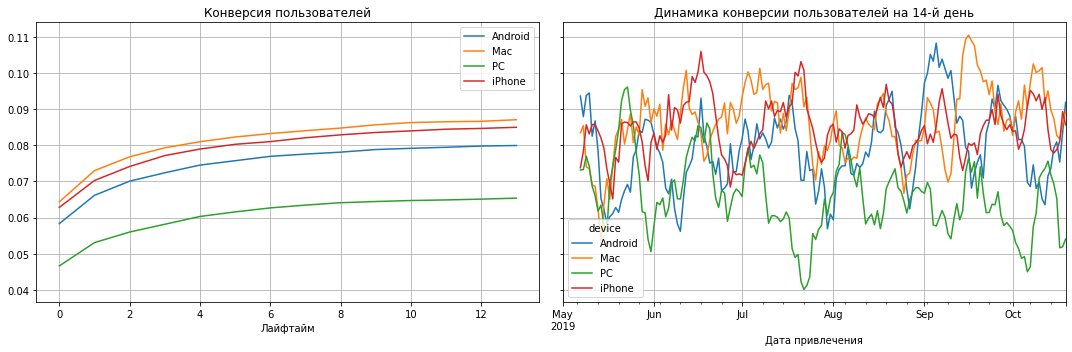

In [57]:
conversion_raw, conversion, conversion_history = get_conversion(profiles, orders, observation_date , horizon, dimensions=['device'])
plot_conversion(conversion, conversion_history, horizon, window=7)

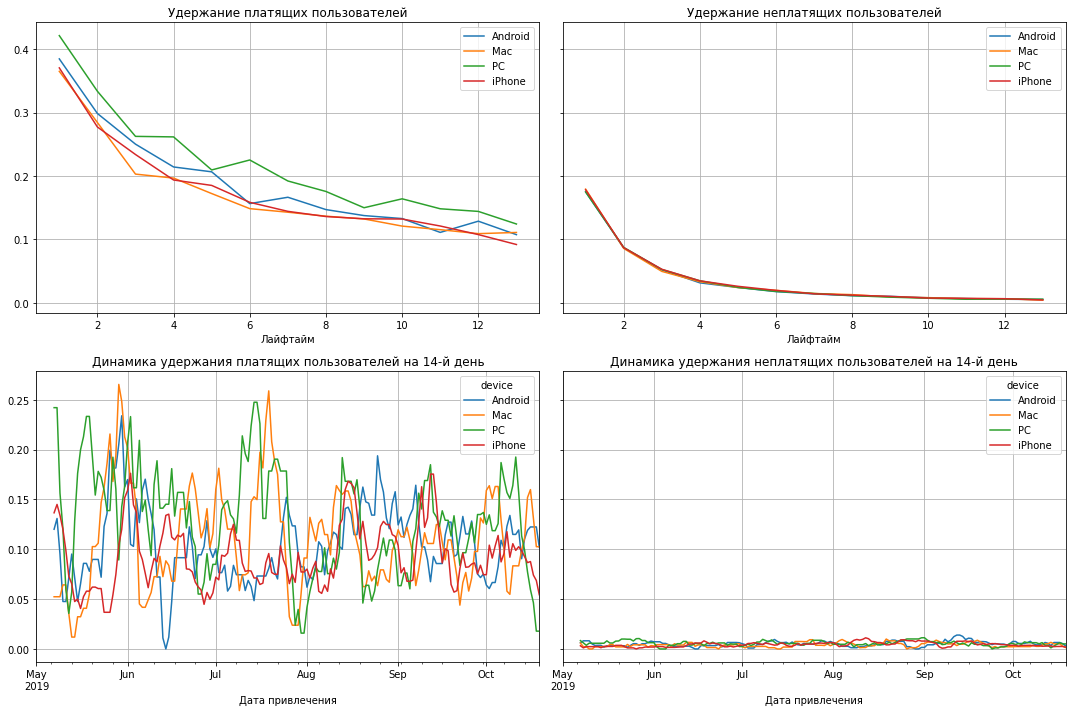

In [58]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date , horizon, dimensions=['device'])

plot_retention(retention_grouped, retention_history, 14) 

##### Вывод
Лучше всего конвертируются пользователи Mac и IPhone, хуже всего пользователи PC.В случае с удержанием все наоборот: лидируют пользователи PC, а пользователи Mac и IPhone удерживаются хуже


#### Конверсия и удержание с разбивкой по регионам

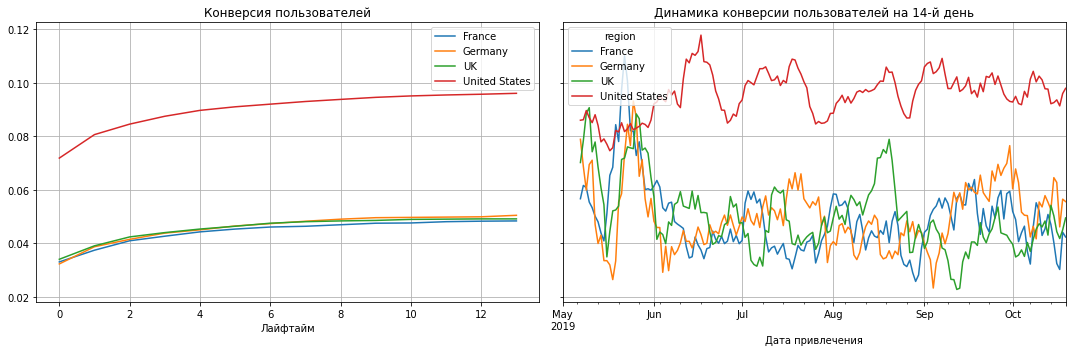

In [59]:
conversion_raw, conversion, conversion_history = get_conversion(profiles, orders, observation_date, horizon, dimensions=['region'])
plot_conversion(conversion, conversion_history, horizon, window=7)

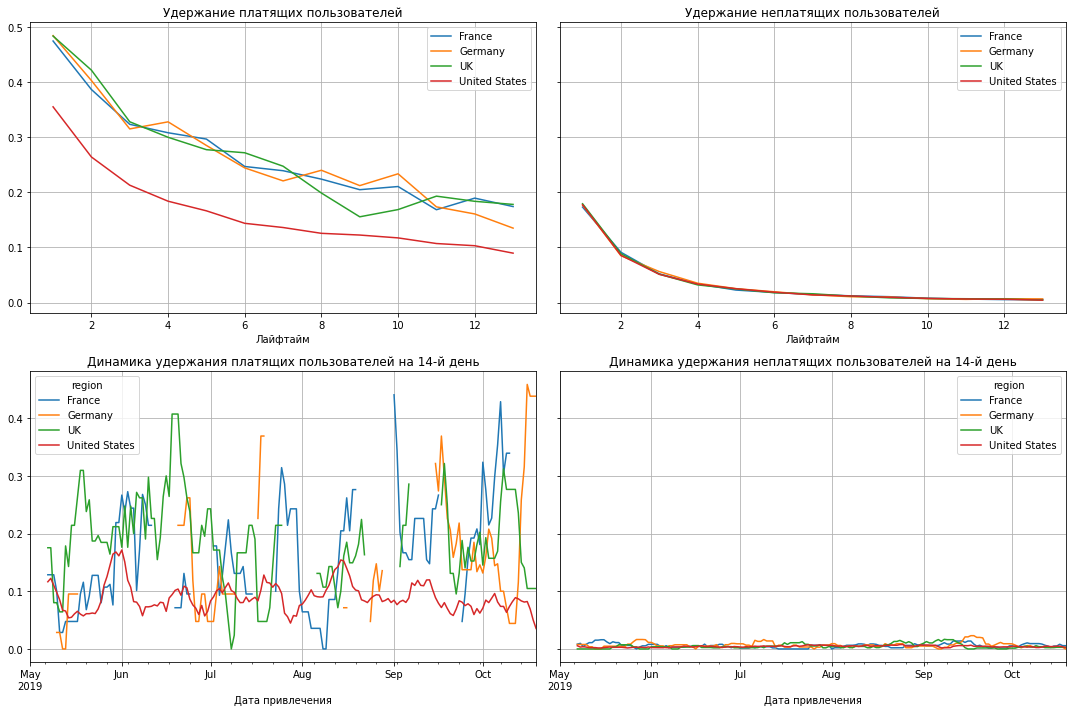

In [60]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon, dimensions=['region'])

plot_retention(retention_grouped, retention_history, horizon) 

##### Вывод
Снова видим, что в США, где не окупается реклама, конверсия сильно выше остальных стран, однако по удержанию Америка является отстающей 

#### Конверсия и удержание с разбивкой по каналам

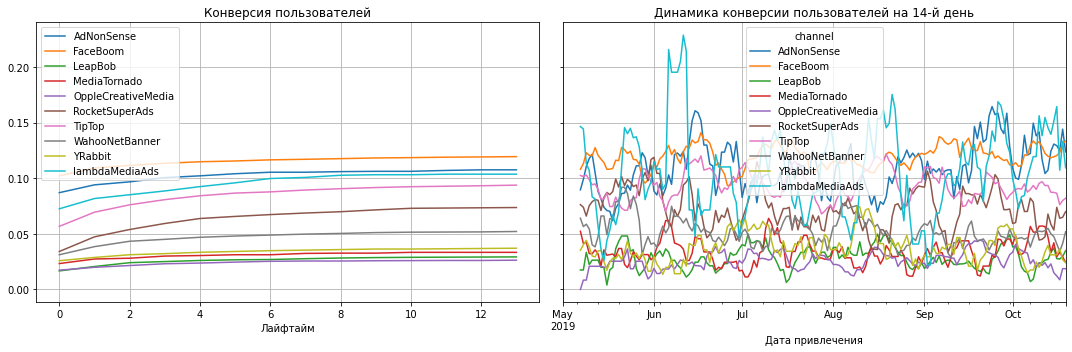

In [61]:
conversion_raw, conversion, conversion_history = get_conversion(profiles, orders, observation_date , horizon, dimensions=['channel'])
plot_conversion(conversion, conversion_history, horizon, window=7)

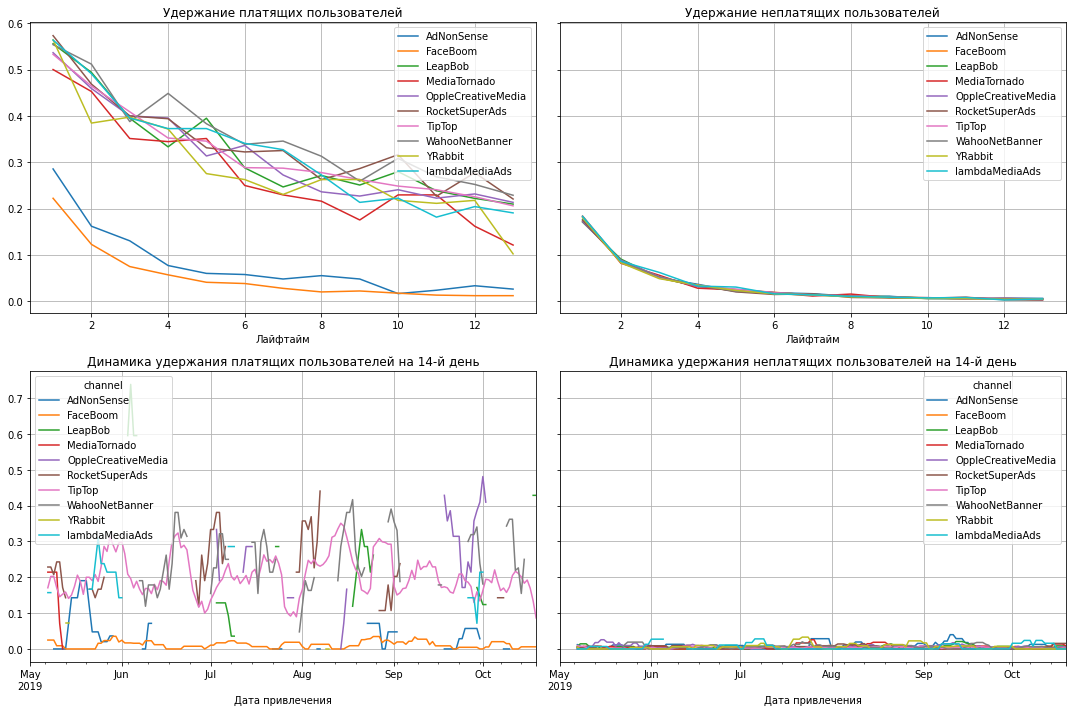

In [62]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date , horizon, dimensions=['channel'])

plot_retention(retention_grouped, retention_history, horizon) 

##### Вывод
FaceBoom и AdNonSense лидируют по конверсии и отстают по удержанию. Отметим, что источник TipTop, реклама в котором не окупилась, занимает средние позиции и по конверсии, и по удержанию, поэтому можно сделать вывод, что причина убытков заключается только в высокой стоимости рекламы. Также обратим внимание на источник lambdaMediaAds - он является лидером по LTV, имеет высокий уровень окупаемости и занимает хорошие позиции по конверсии и удержанию.

#### Анализ окупаемости рекламы с разбивкой по рекламным каналам для США

In [63]:
USA_profiles = profiles.query('region == "United States"')

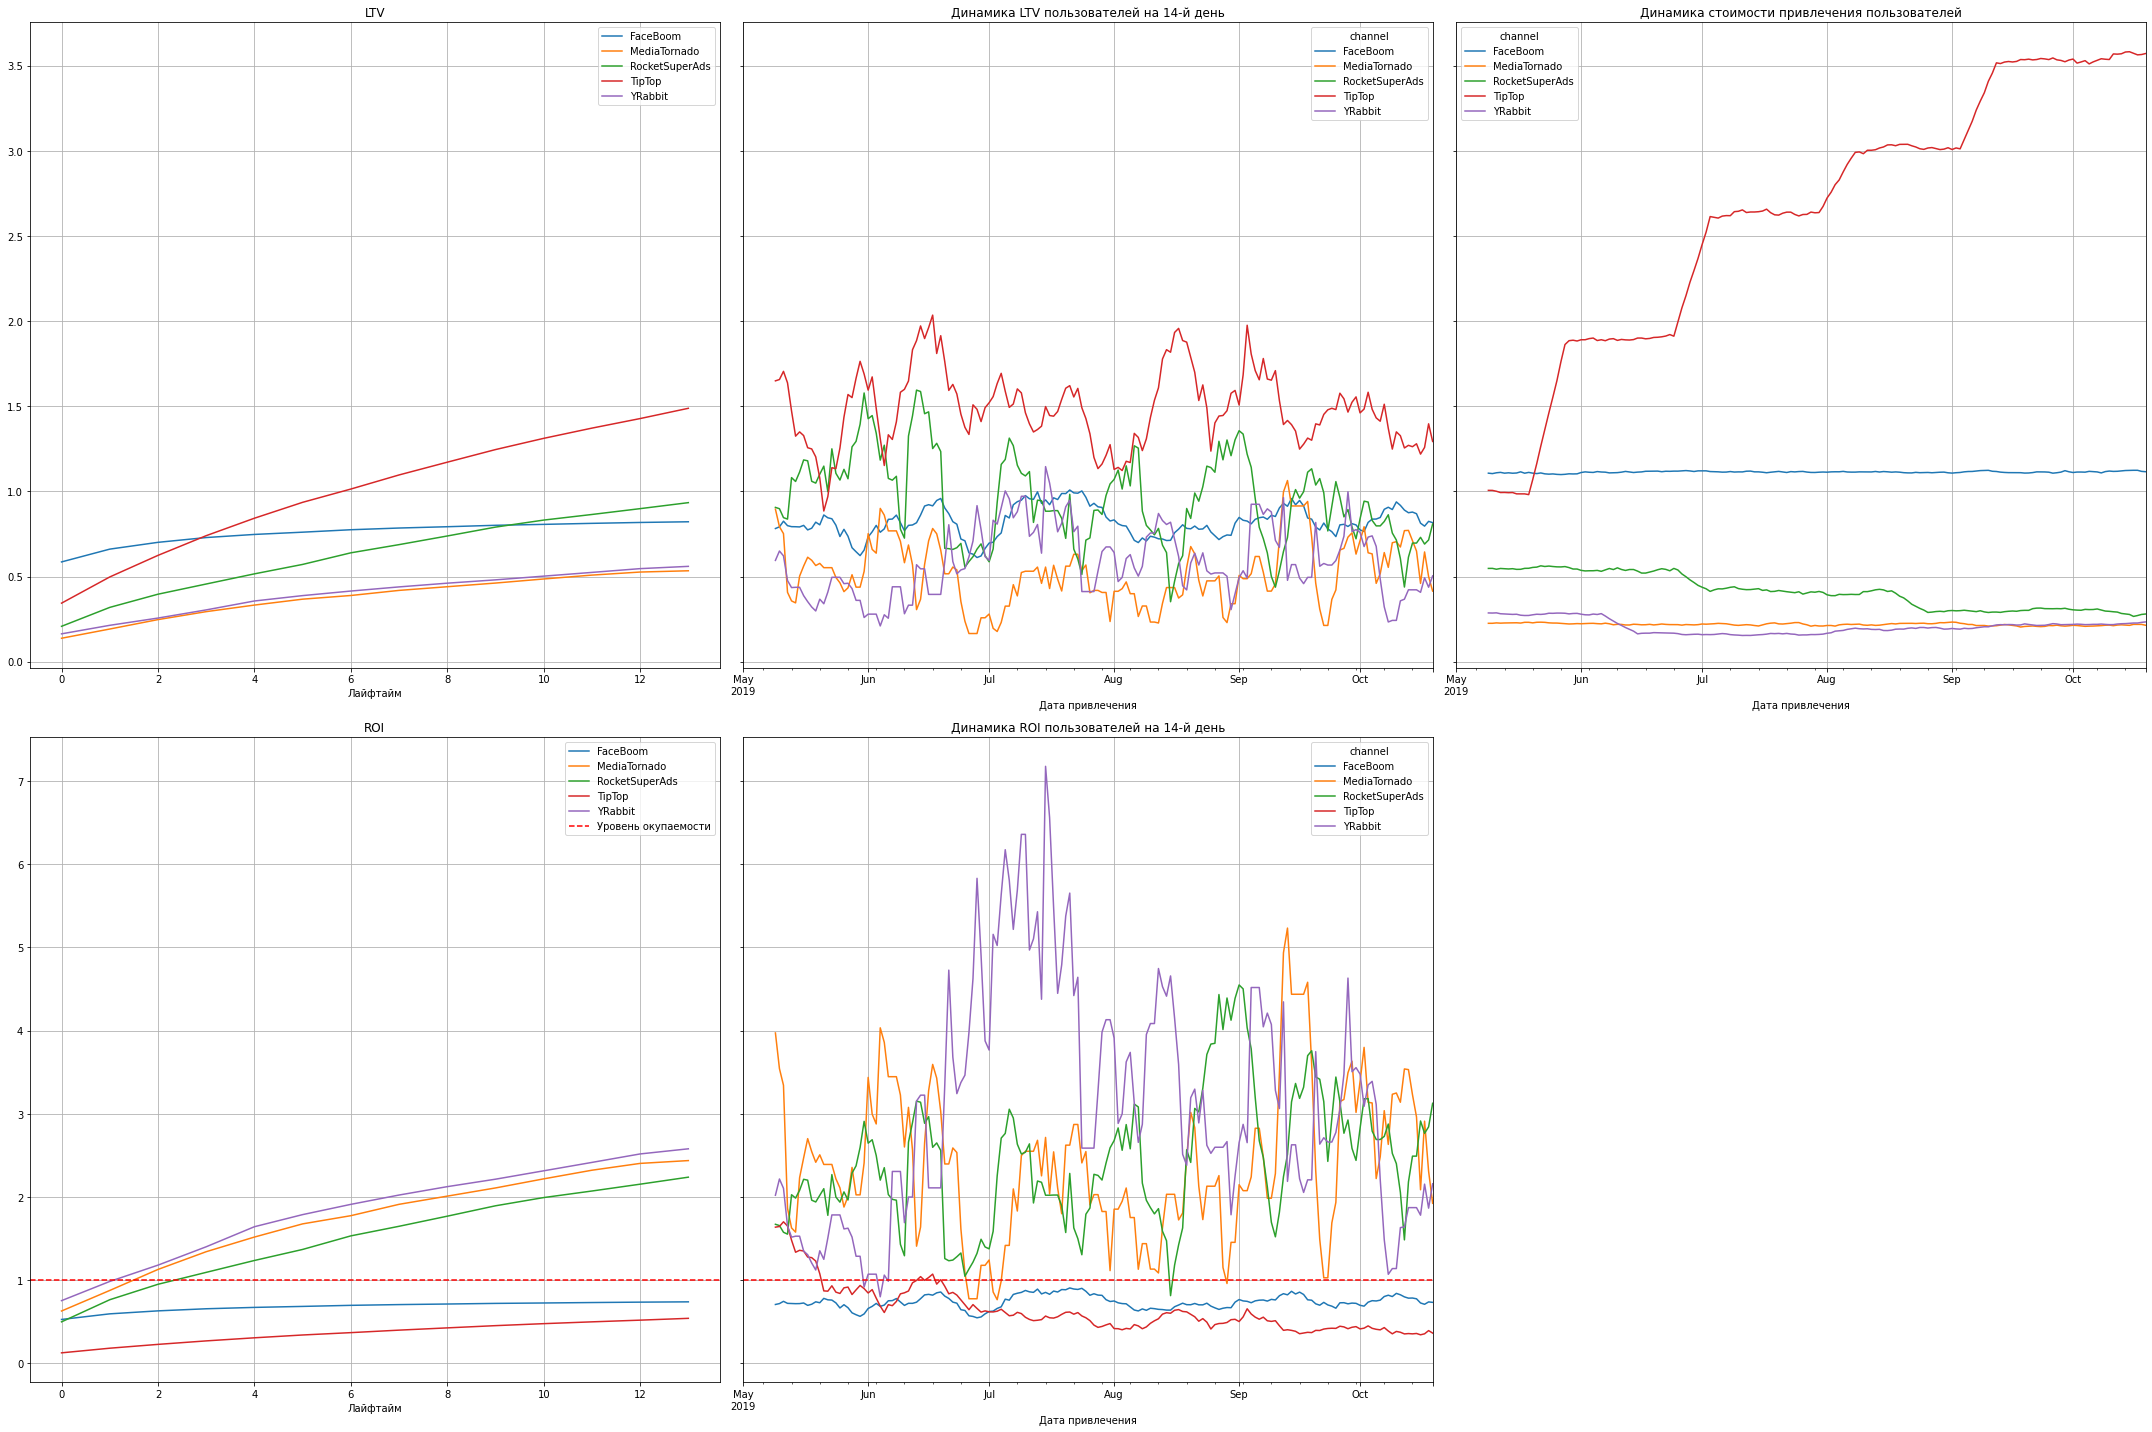

In [64]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(USA_profiles, orders, observation_date, horizon, dimensions=['channel'])
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window = 9)

In [65]:
conversion_raw, conversion, conversion_history = get_conversion(USA_profiles, orders, observation_date, horizon, dimensions=['channel'])
plot_conversion(conversion, conversion_history, horizon, window=7)

In [66]:
retention_raw, retention_grouped, retention_history = get_retention(
    USA_profiles, visits, observation_date, horizon, dimensions=['channel'])

plot_retention(retention_grouped, retention_history, horizon) 

##### Вывод
Из графиков видим, что реклама в США не окупается в двух источниках: TipTop и FaceBoom. FaceBoom лидирует по конверсии, но сильно отстает по удержанию. При этом у этих двух источников относительно высокая стоимость рекламы, а у TipTop стоимость увеличивается во времени.Несмотря на то, что источники YRabbit и MediaTornado лидируют по окупаемости, они сильно отстают по конверсии. Стоит обратить внимание на источник RocketSuperAds: реклама в нем окупается, он занимает третье место по величине конверсии и имеет стабильно высокое удержание

#### Анализ окупаемости рекламы с разбивкой по рекламным каналам для стран ЕС

In [67]:
eu_profiles = profiles.query('region != "United States"')

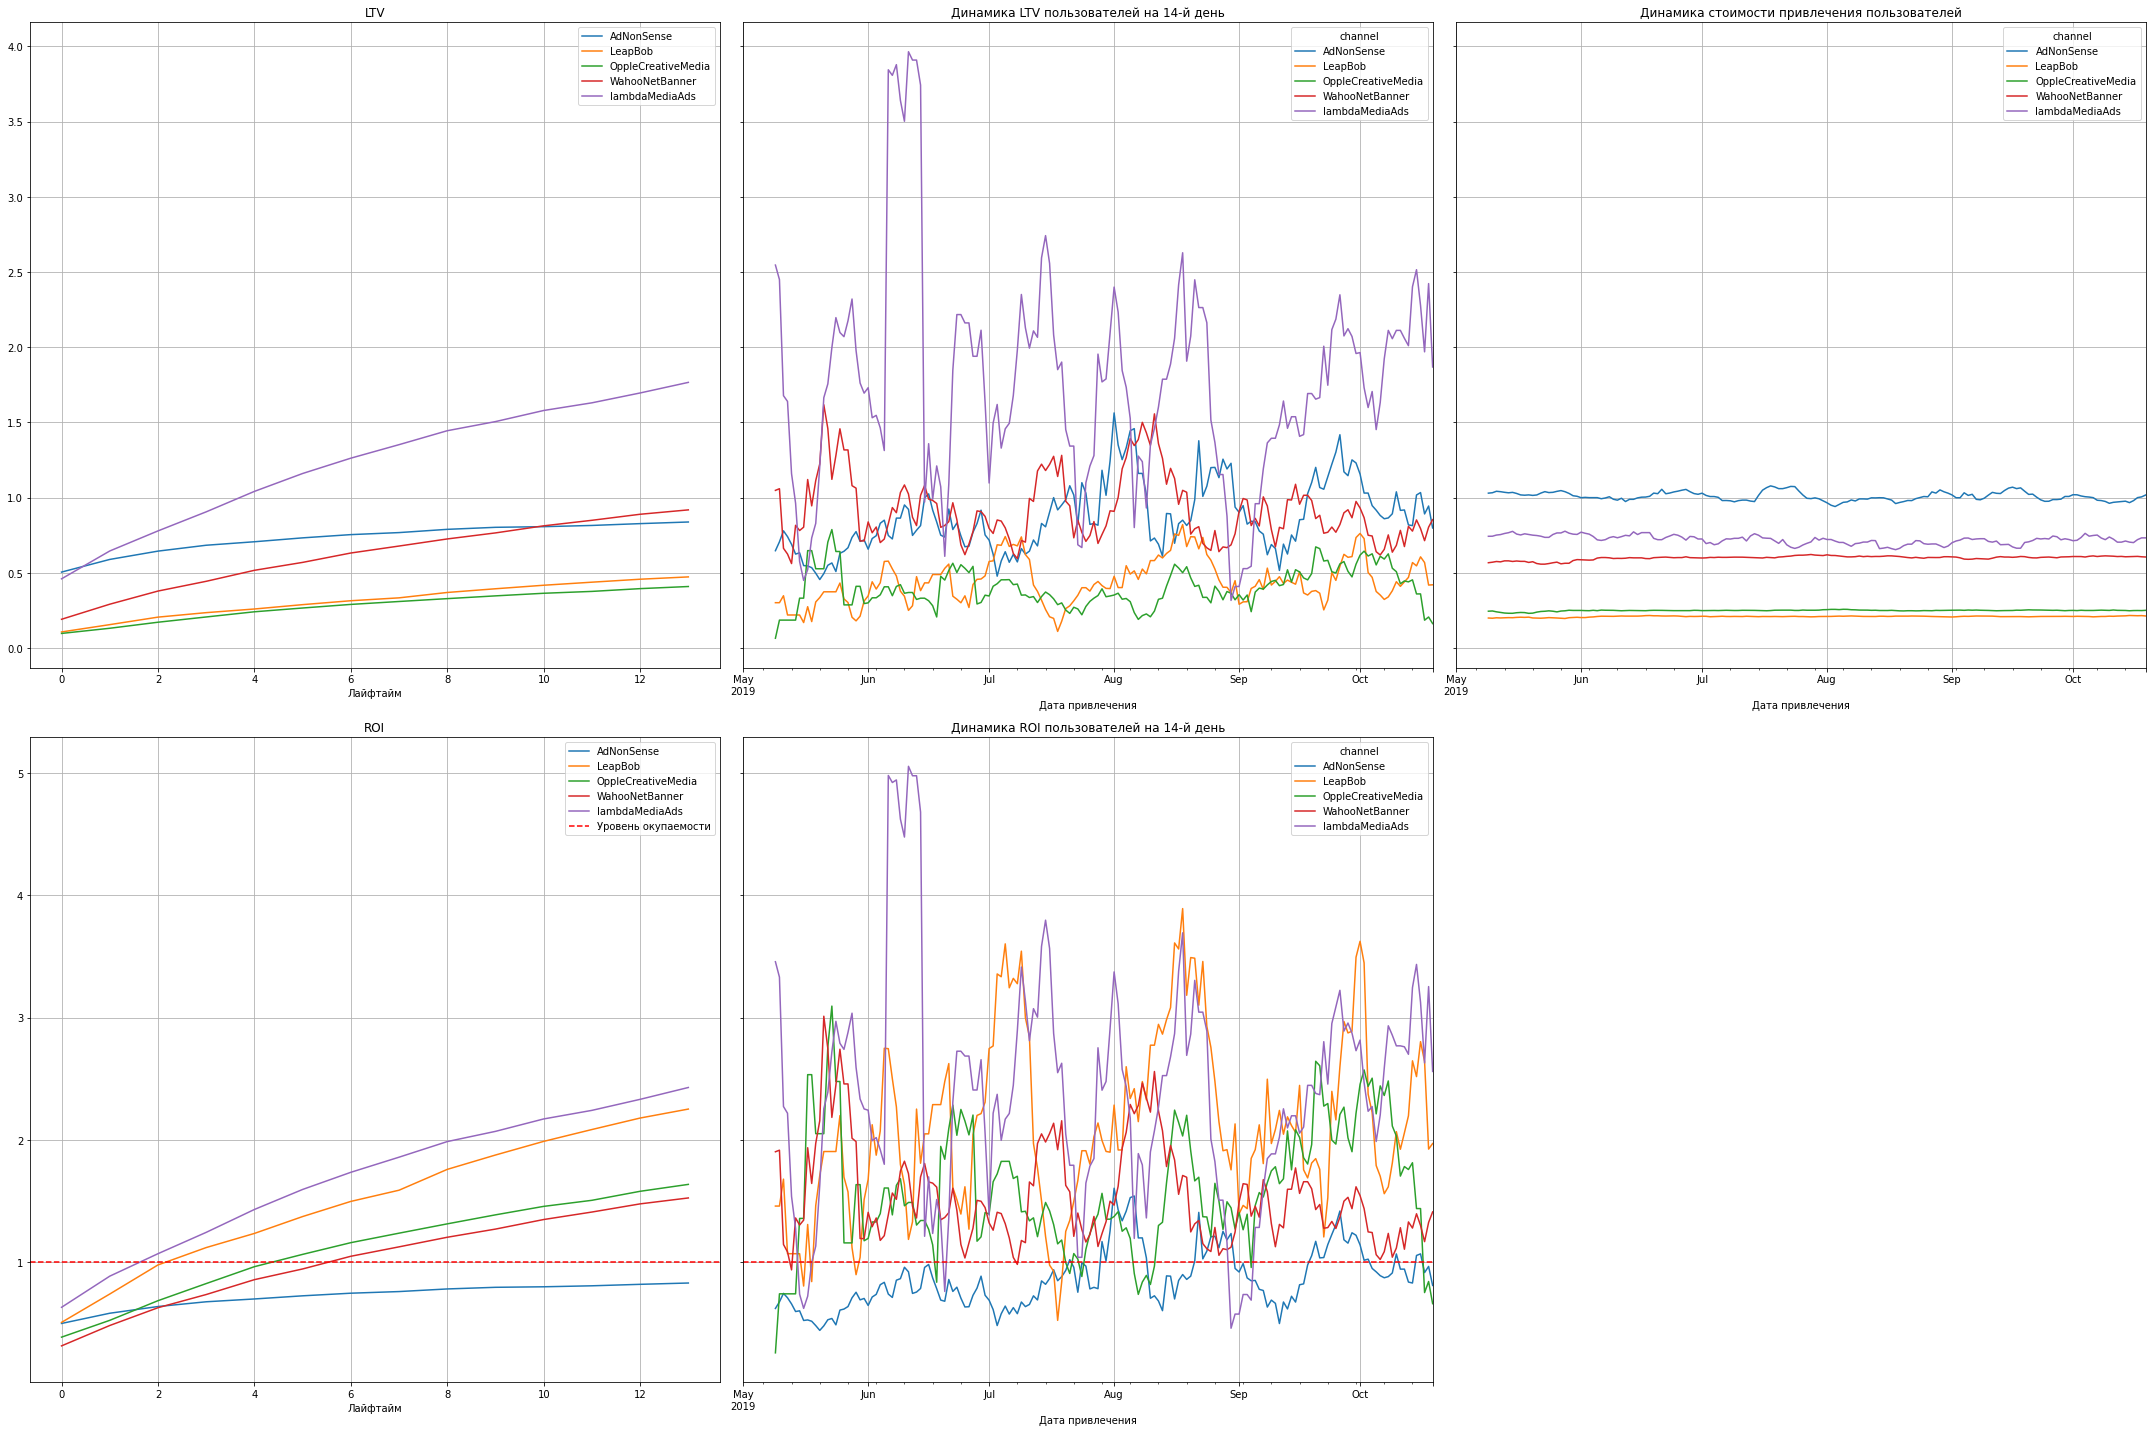

In [68]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(eu_profiles, orders, observation_date, horizon, dimensions=['channel'])
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window = 9)

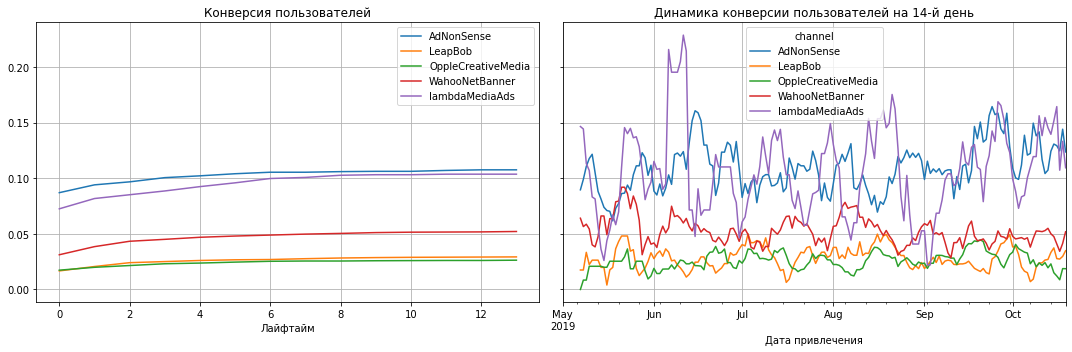

In [69]:
conversion_raw, conversion, conversion_history = get_conversion(eu_profiles, orders, observation_date, horizon, dimensions=['channel'])
plot_conversion(conversion, conversion_history, horizon, window=7)

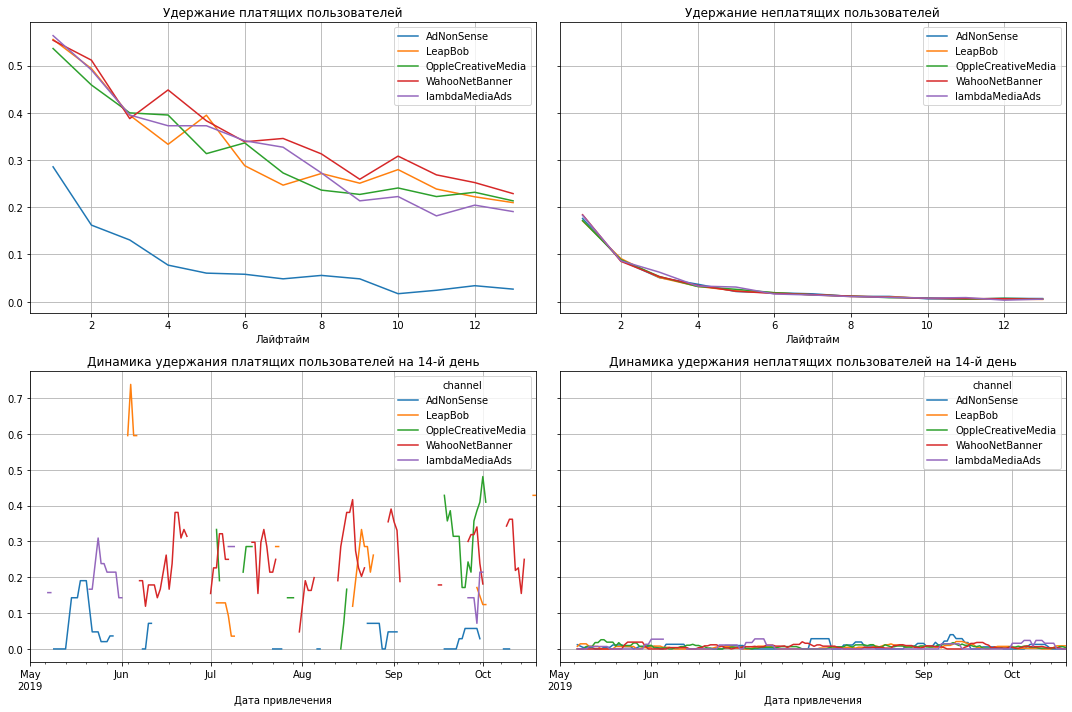

In [70]:
retention_raw, retention_grouped, retention_history = get_retention(
    eu_profiles, visits, observation_date, horizon, dimensions=['channel'])

plot_retention(retention_grouped, retention_history, horizon) 

##### Вывод
AdNonSense единственный источник, который не окупил свои вложения. Стоимость рекламы у этого источника, как и конверсия, самая высокая, но удержание сильно страдает в сравнении с другими источниками.Как и предполагалось ранее, источник lambdaMediaAds имеет высокий уровень конверсии и окупаемости, а также стабильно высокое удержание.Отметим, что у этого источника был высокий пик конверсии и ROI 14 дня в июне 2019 года.

#### Общий вывод по окупаемости
- в целом реклама, направленная на привлечение пользователей, не окупается
- реклама не окупается для пользователей Android, IPhone и Mac.Стоимость привлечения пользователей Apple превышает стоимость для Android и PC.Лучше всего конвертируются пользователи Mac и IPhone, хуже всего пользователи PC.В случае с удержанием все наоборот: лидируют пользователи PC, а пользователи Mac и IPhone удерживаются хуже
- единственная страна, реклама в которой не окупилась, - США. LTV в Америке выше, чем в остальных странах, но стоимость рекламы также гораздо больше и растет с течением времени, поэтому в итоге затраты на рекламу не оправдались. ROI в США с течением времени снижается, Америка лидирует по конверсии, однако наблюдаются проблемы с удержанием пользователей.
- реклама не окупилась в источниках AdNonSense, FaceBoom и TipTop.Расходы по этим источникам также выше чем по остальным, однако затраты на TipTop растут с течением времени и сильно превышают затраты на другие источники.FaceBoom и AdNonSense лидируют по конверсии и отстают по удержанию. Отметим, что источник TipTop, реклама в котором не окупилась, занимает средние позиции и по конверсии, и по удержанию, поэтому можно сделать вывод, что причина убытков заключается в высокой стоимости рекламы. Также обратим внимание на источник lambdaMediaAds - он является лидером по LTV, имеет высокий уровень окупаемости и занимает хорошие позиции по конверсии и удержанию.

#### Общий вывод по проекту

- на этапе предобработки убедились, что в данных нет пропусков и дубликатов. Привели столбцы с датой и временем к типу datetime64;

- задали функции для расчета необходимых метрик и их визуализации;

- построили профили позвателей и определили минимальную и максимальную дату привлечения:   

     - Минимальная дата привлечения пользователей - 1 мая 2019 года
     - Максимальная дата привлечения пользователей - 27 октября 2019 года
     - С учетом горизонта анализа максимальная дата для исследования - 19 октября 2019 года
- на этапе исследовательского анализа выяснили:
  - Больше всего платящих пользователей приходится на США, меньше всего - на Францию;     
  - Больше всего платящих пользователей приходят через канал FaceBoom, меньше всего приходят самостоятельно;
  - Больше всего платящих пользователей предпочитают Mac и IPhone.
- общая сумма расходов на рекламу составляет 105497 долларов;

- Больше всего потратили на источник TipTop, расходы на этот источник составляют больше половины общей суммы расходов по всем источникам. Меньше всего потратили на источник YRabbit;

- Больше всего расходов идет на источники TipTop и FaceBoom, причем в динамике по неделям и месяцам расходы по этим источникам имеют тенденцию к росту, причем траты на FaceBoom растут медленнее, чем на TipTop. Расходы на остальные источники значительно меньше: они не превышают 350 долларов в неделю  и 1200 долларов в месяц;

- Стоимость привлечения у источника TipTop с течением времени растет, средняя стоимость составляет 2,79 долларов. Стоимость остальных источников гораздо стабильнее, изменение CAC не столь значительное в сравнении с TipTop. Средняя стоимость привлечения одного пользователя FaceBoom составляет 1.11 долларов, AdNonSense - 1.01 доллар, у остальных источников средняя стоимость не превышает одного доллара;

- Из графика ROI можно сделать вывод, что реклама не окупается. С течением времени ROI 14-ого дня убывает, а стоимость привлечения увеличивается;

- Кривая конверсии плавно растет от нуля в направлении единицы: от 5.88% в первый день «жизни» пользователей до 8.02% на 14 день. Конверсия 14-ого дня была максимальной в июне и минимальной в мае 2019 года.;

- в целом реклама, направленная на привлечение пользователей, не окупается;

- реклама не окупается для пользователей Android, IPhone и Mac.Стоимость привлечения пользователей Apple превышает стоимость для Android и PC.Лучше всего конвертируются пользователи Mac и IPhone, хуже всего пользователи PC.В случае с удержанием все наоборот: лидируют пользователи PC, а пользователи Mac и IPhone удерживаются хуже;

- единственная страна, реклама в которой не окупилась, - США. LTV в Америке выше, чем в остальных странах, но стоимость рекламы также гораздо больше и растет с течением времени, поэтому в итоге затраты на рекламу не оправдались. ROI в США с течением времени снижается, Америка лидирует по конверсии, однако наблюдаются проблемы с удержанием пользователей;

- реклама не окупилась в источниках AdNonSense, FaceBoom и TipTop.Расходы по этим источникам также выше чем по остальным, однако затраты на TipTop растут с течением времени и сильно превышают затраты на другие источники.FaceBoom и AdNonSense лидируют по конверсии и отстают по удержанию. Отметим, что источник TipTop, реклама в котором не окупилась, занимает средние позиции и по конверсии, и по удержанию, поэтому можно сделать вывод, что причина убытков заключается в высокой стоимости рекламы. Также обратим внимание на источник lambdaMediaAds - он является лидером по LTV, имеет высокий уровень окупаемости и занимает хорошие позиции по конверсии и удержанию.


#### Предположительные причины неэффективности привлечения и рекомендации
При анализе выяснилось, что реклама в целом не окупается. Предположительной причиной являются слишком большие затраты на привлечение пользователей. Убыточными оказались:
- пользователи из США;
- пользователи IPhone, Mac и Android;
- пользователи, пришедшие через AdNonSense, FaceBoom и TipTop.

Стоит оптимизировать свои затраты и больше вкладываться в более доступные страны, устройства и источники.
- Если смотерть на разбивку по регионам, то мы видим, что реклама окупилась во всех европейских странах, при этом они имеют стабильную конверсию и удержание,  retention выше, чем у пользователей США
- Чтобы оптимизировать расходы в США стоит учесть, что источник TipTop, несмотря на высокий уровень конверсии и удержания, приносит убытки из-за высокой стоимости рекламы.FaceBoom лидирует по конверсии, но сильно отстает по удержанию, а также имеет относительно высокий уровень стоимости рекламы.Несмотря на то, что источники YRabbit и MediaTornado лидируют по окупаемости, они сильно отстают по конверсии. Стоит обратить внимание на источник RocketSuperAds: реклама в нем окупается, он занимает третье место по величине конверсии и имеет стабильно высокое удержание
- Для европейских стран AdNonSense единственный источник, который не окупил свои вложения. Стоимость рекламы у этого источника, как и конверсия, самая высокая, но удержание сильно страдает в сравнении с другими источниками.Как и предполагалось ранее, источник lambdaMediaAds имеет высокий уровень конверсии и окупаемости, а также стабильно высокое удержание.Отметим, что у этого источника был высокий пик конверсии и ROI 14 дня в июне 2019 года.

